<a href="https://colab.research.google.com/github/devendrajadhav2470/Credit-Card-Fraud-Detection/blob/main/PRML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Exploration and  Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
data['Amount']=ss.fit_transform(data[['Amount']]).flatten()
data = data.drop('Time',axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
print(data.describe())

(284807, 30)
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.1

In [ ]:
# no null values
data.isna().sum().sum()

0

In [ ]:
# remove duplicate rows
data =data.drop_duplicates()

In [ ]:
# frauds vs legit transactions
Counter = Counter(data['Class'])
print(Counter)

Counter({0: 275190, 1: 473})


In [ ]:
# in percentage
n1 = Counter[0]
n2 = Counter[1]
print("the percentage of fraud transactions is: ",(n2/(n1+n2))*100)
print("the percentage of legitimate transactions is: ",(n1/(n1+n2))*100)

the percentage of fraud transactions is:  0.17158632097887638
the percentage of legitimate transactions is:  99.82841367902112


([<matplotlib.axis.XTick at 0x7fd0538b1190>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

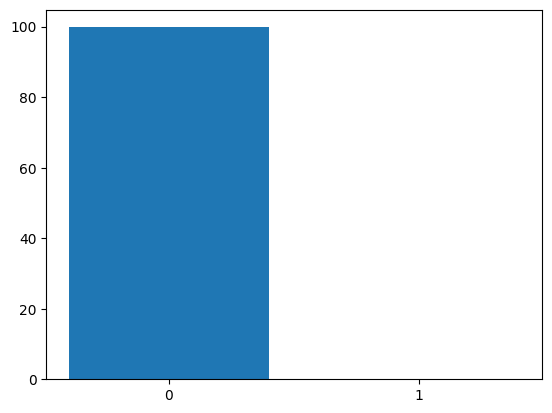

In [ ]:
plt.bar([0,1],[(n1/(n1+n2))*100,(n2/(n1+n2))*100])
plt.xticks([0,1])

<Axes: >

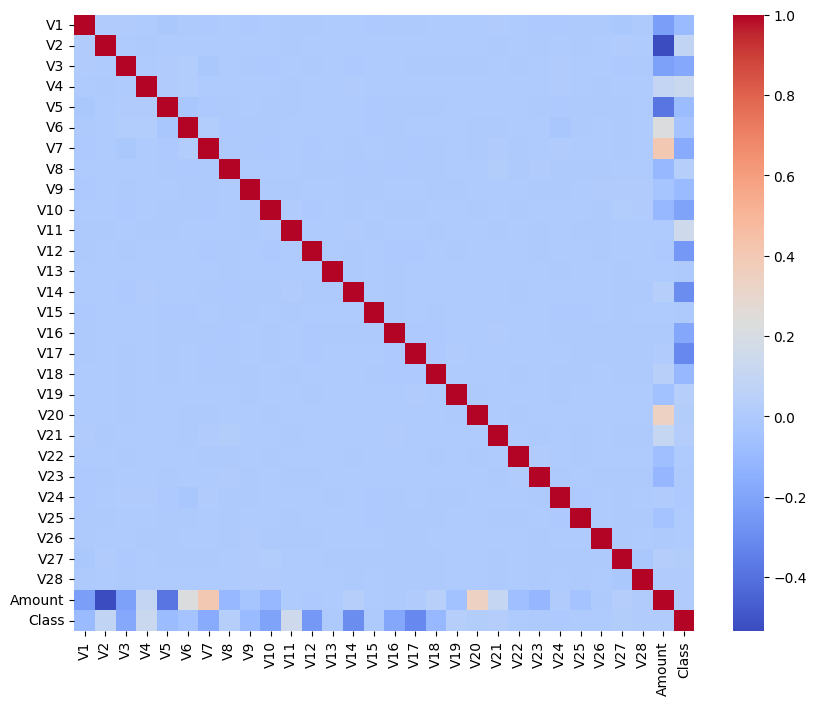

In [ ]:
# visulazing feature correlations
cor_mat = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_mat, annot=False, cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X= data.drop('Class',axis=1)
X= X.values
y= data['Class']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

# Applying random forest,KNN on original Data

In [ ]:
knn1= KNeighborsClassifier()
knn1.fit(Xtrain,ytrain)
knn1_pred= knn1.predict(Xtest)
print(classification_report(ytest,knn1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.92      0.74      0.82       137

    accuracy                           1.00     82699
   macro avg       0.96      0.87      0.91     82699
weighted avg       1.00      1.00      1.00     82699



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier (n_estimators = 25)
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=25)

In [ ]:
rfc_pred= rfc.predict(Xtest)
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

n_estimators= [25,50, 100]
max_depth= [4, 6, 10, 12]

best_n = None
best_mx = None
best_recall= 0
best_mod = None
for n_est in n_estimators :
  for mx in max_depth :
    temp = RandomForestClassifier(n_estimators=n_est,max_depth =mx)
    sc = cross_val_score(temp,X,y,scoring = 'recall')
    if(np.mean(sc)>best_recall):
      best_recall=np.mean(sc)
      best_n=n_est
      best_mx=mx
      best_mod=temp
print("best value for max_depth: ",best_mx)
print("best value for no of estimators: ",best_n)
print("the best recall score is for random forest on original data is  : ",best_recall)

best value for max_depth:  12
best value for no of estimators:  25
the best recall score is for random forest on original data is  :  0.7680890538033395
best value for max_depth:  12
best value for no of estimators:  25
the best recall score is for random forest on original data is  :  0.7680890538033395


# Applying LDA and testing

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X,y)

in the below experiment we observe that after applying lda the performance of Logistic Regression is worse

In [ ]:
# without oversampling the lda transformed data
Xld_train,Xld_test,yld_train,yld_test = train_test_split(X_lda,y, stratify=y,test_size=0.3,random_state=3)
lr1= LogisticRegression()
lr1.fit(Xld_train,yld_train)
lr1_pred= lr1.predict(Xld_test)
print(classification_report(yld_test,lr1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82557
           1       0.91      0.52      0.66       142

    accuracy                           1.00     82699
   macro avg       0.96      0.76      0.83     82699
weighted avg       1.00      1.00      1.00     82699



In [ ]:
# comparing above performance without lda
lr1= LogisticRegression()
lr1.fit(Xtrain,ytrain)
lr1_pred= lr1.predict(Xtest)
print(classification_report(ytest,lr1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.81      0.60      0.69       137

    accuracy                           1.00     82699
   macro avg       0.91      0.80      0.84     82699
weighted avg       1.00      1.00      1.00     82699



# method 1: balancing class weights

In [ ]:
# logistic regression
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(Xtrain,ytrain)
ypred = log_reg.predict(Xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82562
           1       0.07      0.88      0.13       137

    accuracy                           0.98     82699
   macro avg       0.54      0.93      0.56     82699
weighted avg       1.00      0.98      0.99     82699



# Undersampling

In [ ]:
X_us = []
y_us = []
yvals = list(y.values)
for i in range(len(yvals)):
  if(yvals[i]==1):
    X_us.append(X[i])
    y_us.append(int(1))
temp = len(X_us)
for i in range(len(yvals)):
  if(len(X_us)!=2*temp and yvals[i]==0):
    X_us.append(X[i])
    y_us.append(int(0))
X_us = np.array(X_us)
y_us= np.array(y_us)


new_column = y_us
new_column = new_column.reshape(-1,1)
data_undersampled = np.append(X_us,new_column,axis=1)
np.random.shuffle(data_undersampled)

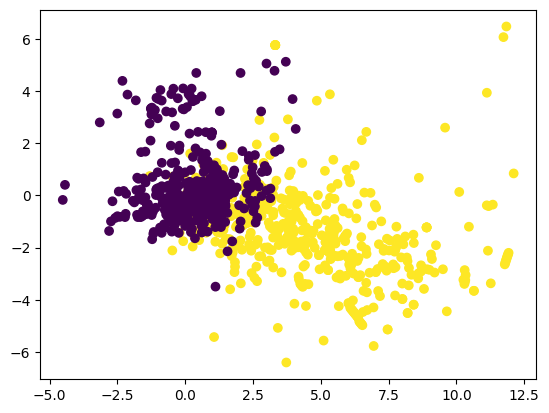

In [ ]:
plt.scatter(X_us[:,3],X_us[:,5],c = y_us)

In [ ]:
X_undersampled= data_undersampled[:,:-1]
y_undersampled  =data_undersampled[:,-1]
Xus_train,Xus_test,yus_train,yus_test = train_test_split(X_undersampled,y_undersampled,test_size=0.3,random_state=0)

In [ ]:
lr2= LogisticRegression()
lr2.fit(Xus_train,yus_train)
lr2_pred= lr2.predict(Xus_test)
print(classification_report(yus_test,lr2_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       136
         1.0       0.98      0.92      0.95       148

    accuracy                           0.95       284
   macro avg       0.95      0.95      0.95       284
weighted avg       0.95      0.95      0.95       284



In [ ]:
knn2= KNeighborsClassifier()
knn2.fit(Xus_train,yus_train)
knn2_pred= knn2.predict(Xus_test)
print(classification_report(yus_test,knn2_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       136
         1.0       0.99      0.90      0.94       148

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [ ]:
svm2= SVC()
svm2.fit(Xus_train,yus_train)
svm2_pred= svm2.predict(Xus_test)
print(classification_report(yus_test,svm2_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       136
         1.0       0.98      0.89      0.93       148

    accuracy                           0.93       284
   macro avg       0.94      0.93      0.93       284
weighted avg       0.94      0.93      0.93       284



In [ ]:
dtc2= DecisionTreeClassifier()
dtc2.fit(Xus_train,yus_train)
dtc2_pred= dtc2.predict(Xus_test)
print(classification_report(yus_test,dtc2_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       136
         1.0       0.87      0.90      0.88       148

    accuracy                           0.88       284
   macro avg       0.88      0.88      0.88       284
weighted avg       0.88      0.88      0.88       284



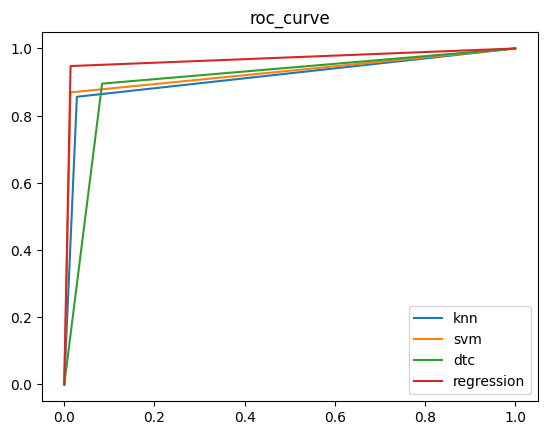

In [ ]:
 # plotting roc curves for evaluation
from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, knn_thresholds = roc_curve(yus_test, knn2_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(yus_test, svm2_pred)
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(yus_test, dtc2_pred)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(yus_test, lr2_pred)
plt.title('roc_curve')
plt.plot(knn_fpr, knn_tpr,label='knn')
plt.plot(svm_fpr, svm_tpr,label='svm')
plt.plot(dtc_fpr, dtc_tpr,label= 'dtc')
plt.plot(lr_fpr,lr_tpr,label='regression')
plt.legend()
plt.show()

In [ ]:
lr2_pred= lr2.predict(Xtest)
print(classification_report(ytest,lr2_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     82562
           1       0.01      0.92      0.02       137

    accuracy                           0.81     82699
   macro avg       0.50      0.87      0.46     82699
weighted avg       1.00      0.81      0.89     82699



In [ ]:
knn2_pred= knn2.predict(Xtest)
print(classification_report(ytest,knn2_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     82562
           1       0.03      0.91      0.06       137

    accuracy                           0.95     82699
   macro avg       0.51      0.93      0.52     82699
weighted avg       1.00      0.95      0.97     82699



In [ ]:
svm2_pred= svm2.predict(Xtest)
print(classification_report(ytest,svm2_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     82562
           1       0.05      0.88      0.09       137

    accuracy                           0.97     82699
   macro avg       0.52      0.92      0.54     82699
weighted avg       1.00      0.97      0.98     82699



In [ ]:
dtc2_pred= dtc2.predict(Xtest)
print(classification_report(ytest,dtc2_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     82562
           1       0.01      0.96      0.01       137

    accuracy                           0.78     82699
   macro avg       0.50      0.87      0.44     82699
weighted avg       1.00      0.78      0.87     82699



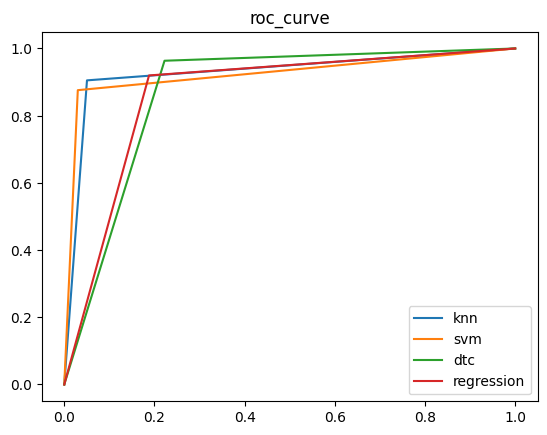

In [ ]:
from sklearn.metrics import roc_curve
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn2_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(ytest, svm2_pred)
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(ytest, dtc2_pred)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(ytest, lr2_pred)
plt.title('roc_curve')
plt.plot(knn_fpr, knn_tpr,label='knn')
plt.plot(svm_fpr, svm_tpr,label='svm')
plt.plot(dtc_fpr, dtc_tpr,label= 'dtc')
plt.plot(lr_fpr,lr_tpr,label='regression')
plt.legend()
plt.show()

#using NearMiss undersampling method

In [ ]:
# knn
nm = NearMiss(version=2,n_neighbors = 3)
X_underT, y_underT = nm.fit_resample(Xtrain, ytrain)
knn3 = KNeighborsClassifier()
knn3.fit(X_underT,y_underT)
knn3_pred= knn3.predict(Xtest)
print(classification_report(ytest,knn3_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03     82562
           1       0.00      0.99      0.00       137

    accuracy                           0.02     82699
   macro avg       0.50      0.50      0.02     82699
weighted avg       1.00      0.02      0.03     82699



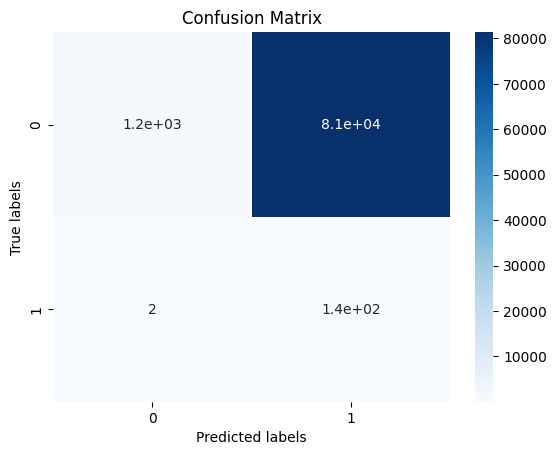

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(ytest,knn3_pred)

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
a=0
for i in y_underT:
  if(i==1):
    a+=1
print(a)


336


# Random Oversampling

In [ ]:
# there is very less no of frauds
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state  = 9)
X_oversampled,y_oversampled= ros.fit_resample(Xtrain,ytrain)
Xos_train,Xos_test,yos_train,yos_test = train_test_split(X_oversampled,y_oversampled,test_size=0.3,random_state=0)

In [ ]:
lr4= LogisticRegression()
lr4.fit(Xos_train,yos_train)
lr4_pred= lr4.predict(Xos_test)
print(classification_report(lr4_pred,yos_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     61001
           1       0.93      0.98      0.95     54576

    accuracy                           0.95    115577
   macro avg       0.95      0.96      0.95    115577
weighted avg       0.96      0.95      0.95    115577



In [ ]:
lr4_pred= lr4.predict(Xtest)
print(classification_report(ytest,lr4_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82562
           1       0.07      0.88      0.13       137

    accuracy                           0.98     82699
   macro avg       0.54      0.93      0.56     82699
weighted avg       1.00      0.98      0.99     82699



In [ ]:
knn4= KNeighborsClassifier()
knn4.fit(Xos_train,yos_train)
knn4_pred= knn4.predict(Xos_test)
print(classification_report(knn4_pred,yos_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58026
           1       1.00      1.00      1.00     57551

    accuracy                           1.00    115577
   macro avg       1.00      1.00      1.00    115577
weighted avg       1.00      1.00      1.00    115577



In [ ]:
knn4_pred= knn4.predict(Xtest)
print(classification_report(ytest,knn4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.62      0.79      0.70       137

    accuracy                           1.00     82699
   macro avg       0.81      0.89      0.85     82699
weighted avg       1.00      1.00      1.00     82699



In [ ]:
dtc4= DecisionTreeClassifier()
dtc4.fit(Xos_train,yos_train)
dtc4_pred= dtc4.predict(Xos_test)
print(classification_report(dtc4_pred,yos_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58041
           1       1.00      1.00      1.00     57536

    accuracy                           1.00    115577
   macro avg       1.00      1.00      1.00    115577
weighted avg       1.00      1.00      1.00    115577



In [ ]:
dtc4_pred= dtc4.predict(Xtest)
print(classification_report(ytest,dtc4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.72      0.72      0.72       137

    accuracy                           1.00     82699
   macro avg       0.86      0.86      0.86     82699
weighted avg       1.00      1.00      1.00     82699



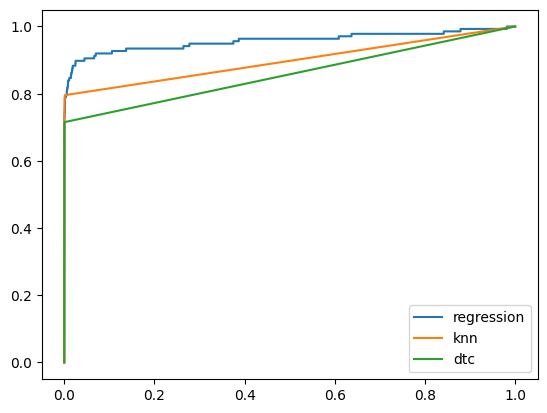

In [ ]:
# roc plot
from sklearn.metrics import roc_curve
lr_probs= lr4.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, lr_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label='regression')

knn_probs= knn4.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, knn_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label='knn')

dtc_probs= dtc4.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, dtc_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label= 'dtc')

plt.legend()
plt.show()

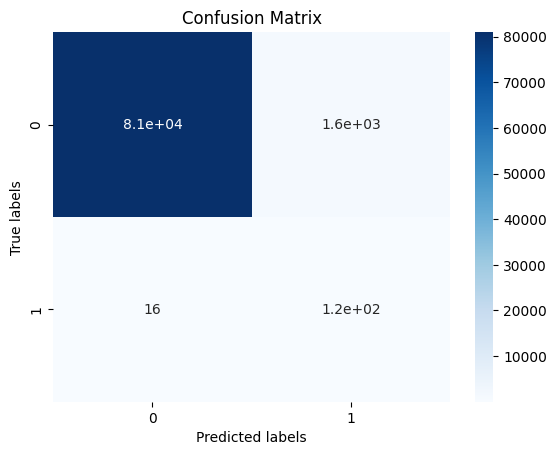

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(ytest,lr4_pred)

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

plt.show()

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state =0)
Xsm,ysm = smote.fit_resample(Xtrain,ytrain)
Xsm_train,Xsm_test,ysm_train,ysm_test = train_test_split(Xsm,ysm,test_size=0.3)

In [ ]:
lr3= LogisticRegression()
lr3.fit(Xsm_train,ysm_train)
lr3_pred= lr3.predict(Xsm_test)
print(classification_report(ysm_test,lr3_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     57301
           1       0.98      0.92      0.95     58276

    accuracy                           0.95    115577
   macro avg       0.95      0.95      0.95    115577
weighted avg       0.95      0.95      0.95    115577



In [ ]:
lr3_pred= lr3.predict(Xtest)
print(classification_report(ytest,lr3_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82562
           1       0.06      0.89      0.12       137

    accuracy                           0.98     82699
   macro avg       0.53      0.93      0.55     82699
weighted avg       1.00      0.98      0.99     82699



In [ ]:
knn3= KNeighborsClassifier()
knn3.fit(Xsm_train,ysm_train)
knn3_pred= knn3.predict(Xsm_test)
print(classification_report(ysm_test,knn3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57301
           1       1.00      1.00      1.00     58276

    accuracy                           1.00    115577
   macro avg       1.00      1.00      1.00    115577
weighted avg       1.00      1.00      1.00    115577



In [ ]:
temp = knn3.predict(Xtest)
print(classification_report(ytest,temp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.41      0.82      0.54       137

    accuracy                           1.00     82699
   macro avg       0.70      0.91      0.77     82699
weighted avg       1.00      1.00      1.00     82699



In [ ]:
dtc3= DecisionTreeClassifier()
dtc3.fit(Xsm_train,ysm_train)
dtc3_pred= dtc3.predict(Xsm_test)
print(classification_report(ysm_test,dtc3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57301
           1       1.00      1.00      1.00     58276

    accuracy                           1.00    115577
   macro avg       1.00      1.00      1.00    115577
weighted avg       1.00      1.00      1.00    115577



In [ ]:
dtc3_pred= dtc3.predict(Xtest)
print(classification_report(ytest,dtc3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82562
           1       0.34      0.70      0.46       137

    accuracy                           1.00     82699
   macro avg       0.67      0.85      0.73     82699
weighted avg       1.00      1.00      1.00     82699



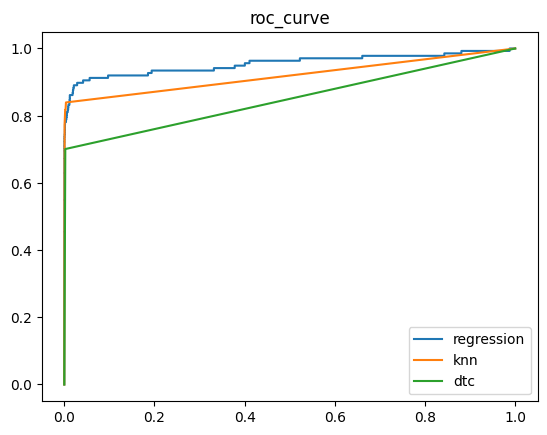

In [ ]:
# roc plot
from sklearn.metrics import roc_curve
lr_probs= lr3.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, lr_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label='regression')

knn_probs= knn3.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, knn_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label='knn')

dtc_probs= dtc3.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, dtc_probs[:,1], pos_label=1)
plt.plot(fpr,tpr,label= 'dtc')

plt.title('roc_curve')
plt.legend()
plt.show()

In [ ]:
# 5 fold cross validation
kf = KFold(n_splits= 5)
acc_lst = []
f1_lst = []
recall_lst = []
for train_index,test_index in  kf.split(X_undersampled):
  temp_Xtrain = X_undersampled[train_index]
  temp_Xtest = X_undersampled[test_index]
  temp_ytrain =y_undersampled[train_index]
  temp_ytest = y_undersampled[test_index]
  temp_dtc=DecisionTreeClassifier()
  temp_dtc.fit(temp_Xtrain,temp_ytrain)
  pred_= temp_dtc.predict(Xtest)
  acc_lst.append(accuracy_score(ytest,pred_))
  recall_lst.append(recall_score(ytest,pred_,pos_label=1))
  f1_lst.append(f1_score(ytest,pred_))
print(acc_lst)
print(f1_lst)
print(recall_lst)
print("The average accuracy is:",np.mean(acc_lst))
print("The average f1_score is:",np.mean(f1_lst))
print("The average racall is:",np.mean(recall_lst))

[0.8114729319580648, 0.696598507841691, 0.6827168405905755, 0.7168889587540357, 0.7662245009008574]
[0.01702288632494799, 0.010724283404959982, 0.010035842293906812, 0.011233582499260947, 0.013370757846389384]
[0.9854014598540146, 0.9927007299270073, 0.9708029197080292, 0.9708029197080292, 0.9562043795620438]
The average accuracy is: 0.7347803480090449
The average f1_score is: 0.012477470473893023
The average racall is: 0.9751824817518248
